<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Visual Behavior Neuropixels Optotagging Tutorial SWDB 2022 </h1> 


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>This notebook will introduce you to optotagging in the Visual Behavior Neuropixels dataset and associated AllenSDK functions. 
    

<h3> Why optotagging? </h3>
<ul>    
<li>In extracellular electrophysiology, we have very little information about cell types, beyond simple metrics like waveform duration</li>

<li>One way to record from genetically-identified cell types is to express channelrhodopsin with a transgenic mouse, then shine light on the brain during a recording</li>

<li>The units that are activated strongly by the light likely express channelrhodopsin, and therefore belong to the genetically defined cell type of interest</li>

<li>However, there is not one generally accepted method for defining whether a cell has been optotagged. The strength of response to light is determined by many factors, including light power, location/spread of illumination, depth in the brain, level of channelrhodopsin expression, and more.</li>

<li>Below we will show one example method of defining which cells are optotagged</li>
</ul>
</div>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> Access the dataset </h2>
    
</div>

In [2]:
import platform
platstring = platform.platform()

data_dirname = 'visual-behavior-neuropixels'
use_static = False
if 'Darwin' in platstring or 'macOS' in platstring:
    # macOS 
    data_root = "/Volumes/Brain2022/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn' in platstring):
    # then on AWS
    data_root = "/data/"
    data_dirname = 'visual-behavior-neuropixels-data'
    use_static = True
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2022/"

In [3]:
from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

In [4]:
# this path should point to the location of the dataset on your platform
cache_dir = os.path.join(data_root, data_dirname)

cache = VisualBehaviorNeuropixelsProjectCache.from_local_cache(
            cache_dir=cache_dir, use_static_cache=use_static)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2> Filtering the sessions table for a session of interest </h2>
    
<p>Let's grab a session that fulfills these criteria:
<ul>
    <li><code>Novel</code> images presented</li>
    <li><code>Sst-IRES-Cre</code> mouse</li>
</ul>
</div>

In [5]:
ecephys_sessions_table = cache.get_ecephys_session_table()

sst_novel_sessions = ecephys_sessions_table.loc[(ecephys_sessions_table['genotype'].str.contains('Sst')) & 
                                            (ecephys_sessions_table['experience_level']=='Novel')]
sst_novel_sessions.head(5)

behavior_session_id      date_of_acquisition  \
ecephys_session_id                                                 
1053941483                   1053960987  2020-10-01 17:03:58.362   
1064644573                   1064666428  2020-11-19 15:18:01.372   
1048189115                   1048221709  2020-09-03 14:16:57.913   
1048196054                   1048222325  2020-09-03 14:25:07.290   
1065905010                   1065929713  2020-11-24 14:21:48.847   

                   equipment_name                 session_type  mouse_id  \
ecephys_session_id                                                         
1053941483                   NP.1  EPHYS_1_images_H_3uL_reward    527749   
1064644573                   NP.1  EPHYS_1_images_H_3uL_reward    544456   
1048189115                   NP.1  EPHYS_1_images_H_3uL_reward    509808   
1048196054                   NP.0  EPHYS_1_images_H_3uL_reward    524925   
1065905010                   NP.0  EPHYS_1_images_H_3uL_reward    544358   

                                                         genotype sex  \
ecephys_session_id                                                      
1053941483          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   M   
1064644573          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   M   
1048189115          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   M   
1048196054          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   F   
1065905010          Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt   F   

                                project_code  age_in_days  unit_count  ...  \
ecephys_session_id                                                     ...   
1053941483          NeuropixelVisualBehavior          180      1543.0  ...   
1064644573          NeuropixelVisualBehavior          120      2254.0  ...   
1048189115          NeuropixelVisualBehavior          264      1925.0  ...   
1048196054          NeuropixelVisualBehavior          166      2288.0  ...   
1065905010          NeuropixelVisualBehavior          126      1998.0  ...   

                    channel_count  \
ecephys_session_id                  
1053941483                 2304.0   
1064644573                 2304.0   
1048189115                 2304.0   
1048196054                 2304.0   
1065905010                 2304.0   

                                                   structure_acronyms  \
ecephys_session_id                                                      
1053941483          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   
1064644573          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   
1048189115          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   
1048196054          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   
1065905010          ['APN', 'CA1', 'CA3', 'DG-mo', 'DG-po', 'DG-sg...   

                   image_set prior_exposures_to_image_set  session_number  \
ecephys_session_id                                                          
1053941483                 H                          0.0               2   
1064644573                 H                          0.0               2   
1048189115                 H                          0.0               2   
1048196054                 H                          0.0               2   
1065905010                 H                          0.0               2   

                    experience_level prior_exposures_to_omissions  file_id  \
ecephys_session_id                                                           
1053941483                     Novel                          1.0        6   
1064644573                     Novel                          1.0       27   
1048189115                     Novel                          1.0       37   
1048196054                     Novel                          1.0       38   
1065905010                     Novel                          1.0       39   

                    abnormal_histology abnormal_activity  
ecephys_session_id               

In [6]:
session_id = 1053941483
session = cache.get_ecephys_session(
            ecephys_session_id=session_id)

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\hdmf\spec\namespace.py:532: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> Load units, channels, and spike_times</h2>

<p>Now, let's load the units, channels, and spike_times, and merge the units and channels tables as in the first tutorial
    
</div>

In [7]:
units = session.get_units()
channels = session.get_channels()
units = units.merge(channels, left_on='peak_channel_id', right_index=True)

spike_times = session.spike_times

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We will use the <code>makePSTH</code> and <code>make_neuron_time_trials_tensor</code> functions, so we should define them here or import them

</div>

In [8]:
def makePSTH(spikes, startTimes, windowDur, binSize=0.001):
    '''
    Convenience function to compute a peri-stimulus-time histogram
    (see section 7.2.2 here: https://neuronaldynamics.epfl.ch/online/Ch7.S2.html)
    INPUTS:
        spikes: spike times in seconds for one unit
        startTimes: trial start times in seconds; the first spike count 
            bin will be aligned to these times
        windowDur: trial duration in seconds
        binSize: size of spike count bins in seconds
    OUTPUTS:
        Tuple of (PSTH, bins), where:
            PSTH gives the trial-averaged spike rate for 
                each time bin aligned to the start times;
            bins are the bin edges as defined by numpy histogram
    '''
    bins = np.arange(0,windowDur+binSize,binSize)
    counts = np.zeros(bins.size-1)
    for start in startTimes:
        startInd = np.searchsorted(spikes, start)
        endInd = np.searchsorted(spikes, start+windowDur)
        counts = counts + np.histogram(spikes[startInd:endInd]-start, bins)[0]
    
    counts = counts/len(startTimes)
    return counts/binSize, bins[:-1]


def make_neuron_time_trials_array(units, stim_table, 
                                   time_before, trial_duration,
                                   bin_size=0.001):
    '''
    Function to make a 3D array with dimensions [neurons, time bins, trials] to store
    the spike counts for stimulus presentation trials. 
    INPUTS:
        units: dataframe with unit info (same form as session.units table)
        stim_table: dataframe whose indices are trial ids and containing a
            'start_time' column indicating when each trial began
        time_before: seconds to take before each start_time in the stim_table
        trial_duration: total time in seconds to take for each trial
        bin_size: bin_size in seconds used to bin spike counts 
    OUTPUTS:
        unit_array: 3D array storing spike counts. The value in [i,j,k] 
            is the spike count for neuron i at time bin j in the kth trial.
        time_vector: vector storing the trial timestamps for the time bins
    '''
    # Get dimensions of output array
    neuron_number = len(units)
    trial_number = len(stim_table)
    num_time_bins = int(trial_duration/bin_size)
    
    # Initialize array
    unit_array = np.zeros((neuron_number, num_time_bins, trial_number))
    
    # Loop through units and trials and store spike counts for every time bin
    for u_counter, (iu, unit) in enumerate(units.iterrows()):
        
        # grab spike times for this unit
        unit_spike_times = spike_times[iu]
        
        # now loop through trials and make a PSTH for this unit for every trial
        for t_counter, (it, trial) in enumerate(stim_table.iterrows()):
            trial_start = trial.start_time - time_before
            unit_array[u_counter, :, t_counter] = makePSTH(unit_spike_times, 
                                                            [trial_start], 
                                                            trial_duration, 
                                                            binSize=bin_size)[0]
    
    # Make the time vector that will label the time axis
    time_vector = np.arange(num_time_bins)*bin_size - time_before
    
    return unit_array, time_vector

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> 1: Using Optotagging to Identify SST Neurons </h2>
<p>Since this is an SST mouse, we should see putative SST+ interneurons that are activated during our optotagging protocol. Let's load the optotagging stimulus table and plot PSTHs triggered on the laser onset. For more examples and useful info about optotagging, you can check out the Visual Coding Neuropixels Optotagging notebook <a href="https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html">here</a> (though note that not all the functionality in the visual coding SDK will work for this dataset).
    
</div>

In [9]:
opto_table = session.optotagging_table
opto_table.head()

start_time                     condition  level   stop_time  \
id                                                                
0   8819.44710         a single square pulse   0.78  8819.45710   
1   8821.29822  half-period of a cosine wave   1.70  8822.29822   
2   8823.42800  half-period of a cosine wave   1.00  8824.42800   
3   8825.25781  half-period of a cosine wave   0.78  8826.25781   
4   8827.25599         a single square pulse   1.70  8827.26599   

    stimulus_name  duration  
id                           
0           pulse      0.01  
1   raised_cosine      1.00  
2   raised_cosine      1.00  
3   raised_cosine      1.00  
4           pulse      0.01

<div>
<img src="https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/42/a9/42a97aa9-910a-4e62-9b1a-62c26eab3772/opto_waveforms.png", width="700"/>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

If you check out the above table and diagram, you'll see that we use 2 different laser waveforms: a half-period cosine wave that's 1 second long and a short square pulse that's 10 ms long. We drive each at three light levels, giving us 6 total conditions. Now let's plot how cortical neurons respond to the short pulse at high power.
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>1.1: Filter and sort units</b>

</div>

In [10]:
#first let's sort our units by depth
units = units.sort_values('probe_vertical_position', ascending=False)

#now we'll filter them for good units
good_unit_filter = ((units['snr']>1)&             
                    (units['isi_violations']<1)& 
                    (units['firing_rate']>0.1)&   
                    (units['quality']=='good'))  

area_filter = units['structure_acronym'].str.contains('VIS')
cortical_units = units[good_unit_filter & area_filter]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>1.2: Make a 3D neuron-time-trials array from optotagging epoch</b>

</div>

In [11]:
#Make 3D array
time_before_laser = 0.5
trial_duration = 1.5
bin_size = 0.001
time_array = np.arange(-time_before_laser,trial_duration-time_before_laser,bin_size)
opto_array,time = make_neuron_time_trials_array(cortical_units, opto_table, time_before_laser, trial_duration, bin_size)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>1.3: Select and average over the high intensity 10ms stimulation trials</b>

</div>

In [12]:
#Grab the short pulse + high power trials
duration = opto_table.duration.min()
level = opto_table.level.max()

#Find the indicies of trials with this duration and level
sel_trials=((opto_table['duration']==duration)&(opto_table['level']==level)).values

#Average over these selected trials
mean_opto_responses=np.nanmean(opto_array[:,:,sel_trials],2)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>1.4: Plot neural responses to optotagging stimulus</b>

</div>

(-10.0, 20.0)

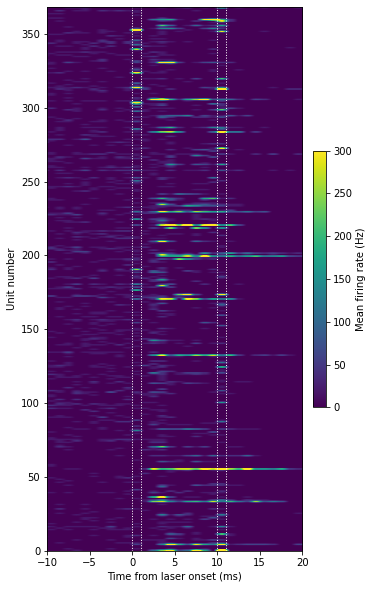

In [13]:
#find the time indices for a short window before and after optogenetic stimulation
time_idx = (time_array>=-0.05)&(time_array<0.05)

#Now plot a heatmap across units showing how they responded to the laser
fig,ax=plt.subplots(1,1)
fig.set_size_inches((5,10))

# Note: when using imshow, the "extent" parameter should match your data axes extent=[xmin, xmax, ymin, ymax].
# Since our bins are 1ms, and we are plotting from -50ms to +50ms, xmin=-50 and xmax=+50
# We also specify the y axis in terms of units, ymin=0 and ymax= the number of units we are plotting
im=ax.imshow(mean_opto_responses[:,time_idx],
             extent=[-50, 50, 0, mean_opto_responses.shape[0]], 
             origin='lower', aspect='auto')
min_clim_val = 0
max_clim_val = 300
im.set_clim([min_clim_val, max_clim_val])    
[ax.axvline(bound, linestyle=':', color='white', linewidth=1.0)\
     for bound in [0,1,11, 10]]
ax.set_xlabel('Time from laser onset (ms)')
ax.set_ylabel('Unit number')
cb = plt.colorbar(im,fraction=0.046, pad=0.04)
cb.set_label('Mean firing rate (Hz)')

ax.set_xlim([-10,20])

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Here we can see that most units don't respond to the short laser pulse. But there is a population of ~20 units that do show elevated firing rates. Note that the activity occurring at the onset and offset of the laser (along the dotted lines) is likely artifactual and should be excluded from analysis.

<p>There are multiple ways to define which units are optotagged and therefore Cre-positive. We will just show one set of optotagging criteria. You can even try to define your own criteria!
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> 2: Defining neurons as "Optotagged" </h3>

<p>Guidelines:
    
<p>There are a variety of ways to define optotagged cells, but these are the most important things to keep in mind:
<ul>
<li>Spikes that occur precisely at the start or end of a light pulse are likely artifactual, and need to be ignored.</li>
<li>The bright blue light required for optotagging can be seen by the mouse, so any spikes that occur more than 40 ms after the stimulus onset may result from retinal input, as opposed to direct optogenetic drive.</li>
<li>The rate of false negatives (Cre+ cells that are not light-driven) will vary across areas, across depths, and across sessions. We've tried our best to evenly illuminate the entire visual cortex, and to use light powers that can drive spikes throughout all cortical layers, but some variation is inevitable.</li>
</ul>
<p>For these reasons, we've found that the 10 ms pulses are the most useful stimulus for finding true light-evoked activity. These pulses provide a long enough artifact-free window to observe light-evoked spikes, but do not last long enough to be contaminated by visually driven activity.
    
<p>Using the 3D array we created previously, we can search for units that increase their firing rate during the 10 ms pulse:
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>2.1: Compute neurons' baseline (-10 to -2 ms) and evoked (1 to 9 ms) firing rates</b>

</div>

In [14]:
# slice our data array to take the baseline period (before the laser turns on)
baseline_time_idx = (time_array>=-0.010)&(time_array<-0.002)

# then average over this time window in the mean_opto_responses to get the baseline rate for each unit
baseline_rate = np.mean(mean_opto_responses[:,baseline_time_idx],1)

In [15]:
# do the same for the period when the laser was on to get the evoked rate for each unit
# hint: between 1ms and 9ms after the onset of the laser

evoked_rate_idx = (time_array>=0.001)&(time_array<0.009)
evoked_rate = np.mean(mean_opto_responses[:,evoked_rate_idx],1)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>2.2: Plot evoked rate versus baseline rate as a scatter plot</b>

<p>Comparing the baseline and evoked rates, we can see a clear subset of units with a light-evoked increase in firing rate: 
    
</div>

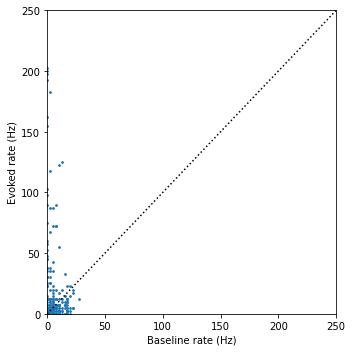

In [16]:
fig,ax=plt.subplots(1,1,figsize=(5,5))

ax.scatter(baseline_rate, evoked_rate, s=3)

axis_limit = 250
ax.plot([0,axis_limit],[0,axis_limit], ':k')
ax.set_xlim([0,axis_limit])
ax.set_ylim([0,axis_limit])

ax.set_xlabel('Baseline rate (Hz)')
ax.set_ylabel('Evoked rate (Hz)')

fig.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>2.3: Select a threshold for defining a unit as optotagged</b>
    
<p>We can select a threshold, such as 5x increase in firing rate (red line), plus an evoked rate of at least 50Hz (blue line), to find the IDs for units that are robustly driven by the light:

</div>

In [17]:
# set optotagging criteria
increase_in_FR = 5 #multiple increase over baseline rate
min_evoked_rate = 50 #Hz

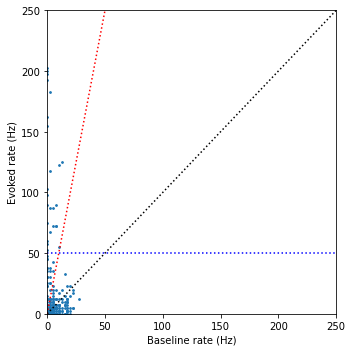

In [18]:
fig,ax=plt.subplots(1,1,figsize=(5,5))

ax.scatter(baseline_rate, evoked_rate, s=3)

axis_limit = 250
ax.plot([0,axis_limit],[0,axis_limit], ':k')
ax.plot([0,axis_limit],[0,axis_limit*increase_in_FR], ':r')
ax.axhline(min_evoked_rate,color='b',linestyle=':')
ax.set_xlim([0,axis_limit])
ax.set_ylim([0,axis_limit])

ax.set_xlabel('Baseline rate (Hz)')
ax.set_ylabel('Evoked rate (Hz)')

fig.tight_layout()

In [19]:
cre_pos_idx = (evoked_rate > min_evoked_rate) & ((evoked_rate / (baseline_rate + 1)) > increase_in_FR) 
# add 1 to prevent divide-by-zero errors
cre_pos_unit_ids = cortical_units[cre_pos_idx==True].index

cre_pos_units = cortical_units.loc[cre_pos_unit_ids]
cre_pos_units.head(2)

PT_ratio   amplitude  amplitude_cutoff  cluster_id  \
id                                                               
1061855316  0.339354  158.830425               0.5         227   
1061855053  0.675283  130.541385               0.5         251   

            cumulative_drift   d_prime  firing_rate  isi_violations  \
id                                                                    
1061855316            600.68  6.073243     2.009925        0.468226   
1061855053            264.21  4.041208     5.054706        0.203606   

            isolation_distance   l_ratio  ...  waveform_duration  \
id                                        ...                      
1061855316           79.148518  0.000153  ...           0.549414   
1061855053          100.591144  0.001928  ...           0.480737   

            anterior_posterior_ccf_coordinate  dorsal_ventral_ccf_coordinate  \
id                                                                             
1061855316                             7113.0                          996.0   
1061855053                             8426.0                         1937.0   

                                                    filtering  \
id                                                              
1061855316  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   
1061855053  AP band: 500 Hz high-pass; LFP band: 1000 Hz l...   

            left_right_ccf_coordinate  probe_channel_number  \
id                                                            
1061855316                     8718.0                   350   
1061855053                     9891.0                   342   

           probe_horizontal_position    probe_id  probe_vertical_position  \
id                                                                          
1061855316                        59  1054059294                     3520   
1061855053                        59  1054059293                     3440   

            structure_acronym  
id                             
1061855316              VISrl  
1061855053              VISal  

[2 rows x 34 columns]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Plotting the PSTHs from these putative optotagged units shows that they do appear to be activated by the optogenetic stimulation:
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>2.4: Use the unit index computed above to select the activity of putative Cre-positive units</b>

</div>

In [20]:
#use the cre_pos_idx to select only putative cre-positive units for plotting
cre_pos_array=opto_array[cre_pos_idx,:,:]

#Average over these selected trials
mean_opto_responses=np.nanmean(cre_pos_array[:,:,sel_trials],2)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>2.5: Plot responses of putative Cre-positive units to optotagging stimuli</b>

</div>

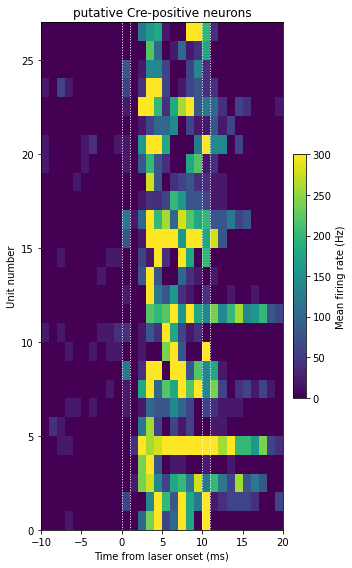

In [21]:
#find the time indices for a short window before and after optogenetic stimulation
time_idx = (time_array>=-0.05)&(time_array<0.05)

fig,ax=plt.subplots(1,1)
fig.set_size_inches((5,8))

im=ax.imshow(mean_opto_responses[:,time_idx],
             extent=[-50, 50, 0, mean_opto_responses.shape[0]], 
             origin='lower', aspect='auto')
min_clim_val = 0
max_clim_val = 300
im.set_clim([min_clim_val, max_clim_val])    
[ax.axvline(bound, linestyle=':', color='white', linewidth=1.0)\
     for bound in [0,1,11,10]]
ax.set_xlabel('Time from laser onset (ms)')
ax.set_ylabel('Unit number')
cb = plt.colorbar(im,fraction=0.046, pad=0.04)
cb.set_label('Mean firing rate (Hz)')

ax.set_xlim([-10,20])
ax.set_title('putative Cre-positive neurons')
fig.tight_layout()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

All units plotted here should noticeably respond to the laser

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>2.6: Select Cre-negative units and plot their responses to optotagging stimuli</b>

</div>

In [22]:
cre_neg_idx = ~cre_pos_idx
cre_neg_unit_ids = cortical_units[cre_neg_idx==True].index

cre_neg_units = cortical_units.loc[cre_neg_unit_ids]
cre_neg_units.head(2)

#Average over these selected trials
cre_neg_array=opto_array[cre_neg_idx,:,:]
mean_opto_responses=np.nanmean(cre_neg_array[:,:,sel_trials],2)

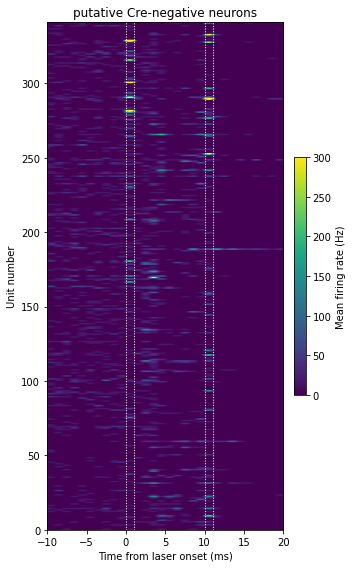

In [23]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches((5,8))

im=ax.imshow(mean_opto_responses[:,time_idx],
             extent=[-50, 50, 0, mean_opto_responses.shape[0]], 
             origin='lower', aspect='auto')
min_clim_val = 0
max_clim_val = 300
im.set_clim([min_clim_val, max_clim_val])    
[ax.axvline(bound, linestyle=':', color='white', linewidth=1.0)\
     for bound in [0,1,10,11]]
ax.set_xlabel('Time from laser onset (ms)')
ax.set_ylabel('Unit number')
cb = plt.colorbar(im,fraction=0.046, pad=0.04)
cb.set_label('Mean firing rate (Hz)')

ax.set_xlim([-10,20])
ax.set_title('putative Cre-negative neurons')
fig.tight_layout()

In this plot we should see very little if any response to the laser, aside from possible artifacts.

Feel free to experiment with changing the optotagging criteria above, or create entirely new ones!

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> 3: Plotting responses of Optotagged neurons to novel and familiar images </h2>

<p>The whole point of optotagging is to classify neurons as a particular type, in this case a genetically defined cell type.
    
<p>Now that we have identified putative SST neurons, let's plot their responses to familiar vs. novel images, much like we did in the tutorial. All we need to do is divde units into Cre-positive and Cre-negative and plot them separately.

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>3.1: Load the <code>stimulus_presentations</code> table:</b>

</div>

In [24]:
stimulus_presentations = session.stimulus_presentations

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>3.2: Next we need to define which images are novel, which requires the <code>getImageNovelty</code> function again, so we should define it here or import it:</b>

</div>

In [25]:
session_id = session.metadata['ecephys_session_id']
is_novel_image_set = ecephys_sessions_table.loc[session_id]['experience_level'] == 'Novel'

IMAGE_SET_KEY={
                'G' : ['im012_r', 'im036_r', 'im044_r', 
                    'im047_r', 'im078_r', 'im115_r'],
                'H' : ['im005_r', 'im024_r', 'im034_r', 
                    'im087_r', 'im104_r', 'im114_r'],
                'shared' : ['im083_r', 'im111_r'],
                'omitted' : 'omitted'
                }

In [26]:
def getImageNovelty(image_name):
    '''
    Function to help annotate the stimulus_presentations table
    to indicate the following info:
        1) whether a given image was:
            a) unique to the G set
            b) unique to the H set
            c) shared across G and H
            d) omitted
        2) whether the image was novel to the mouse
    
    Meant to be run on the image names of the stimulus_presentations table
    
    OUTPUT:
        Tuple indicating (image_set, image_novelty) for one 
        row of the stimulus_presentations table

    '''
    # First check that this image is one of the Natural Images used
    image_in_image_set = any([np.isin(image_name, imset) \
                              for _,imset in IMAGE_SET_KEY.items()]) 
    if not image_in_image_set:
        return np.nan, np.nan

    #Get the image set for this image
    image_set_for_this_image = [name for name, image_set in IMAGE_SET_KEY.items()\
                                if image_name in image_set][0]
    
    #Get the image novelty for this image
    if image_set_for_this_image == 'omitted':
        novelty_for_this_image = np.nan
    else:
        novelty_for_this_image = (is_novel_image_set) and \
                            (np.isin(image_set_for_this_image, ['G', 'H']))
    

    return image_set_for_this_image, novelty_for_this_image

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>3.3: apply the <code>getImageNovelty</code> function to the <code>stimulus_presentations</code> table</b>

</div>

In [27]:
image_info = stimulus_presentations.apply(lambda row: getImageNovelty(row['image_name']), axis=1)  
stimulus_presentations['image_set'] = [i[0] for i in image_info]
stimulus_presentations['is_novel'] = [i[1] for i in image_info]

C:\Anaconda3\envs\allensdk_38_new\lib\site-packages\numpy\lib\arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>3.4: Make 3D arrays for Cre+ versus Cre- units</b>

</div>

In [28]:
#Grab the portion of the stim table that describes changes during the active behavior stimuli 
task_stim_table = stimulus_presentations[stimulus_presentations['active'] & 
                                         stimulus_presentations['is_change']]

#Make tensor
time_before_flash = 1.0
trial_duration = 2.0
bin_size = 0.005

time_array=np.arange(-time_before_flash,trial_duration-time_before_flash,bin_size)

cre_pos_stim_array,time = make_neuron_time_trials_array(cre_pos_units, task_stim_table, time_before_flash, trial_duration, bin_size)
cre_neg_stim_array,time = make_neuron_time_trials_array(cre_neg_units, task_stim_table, time_before_flash, trial_duration, bin_size)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<b>3.5: Plot Cre+ vs. Cre- responses to Familiar changes in one plot, and Novel changes in another</b>

</div>

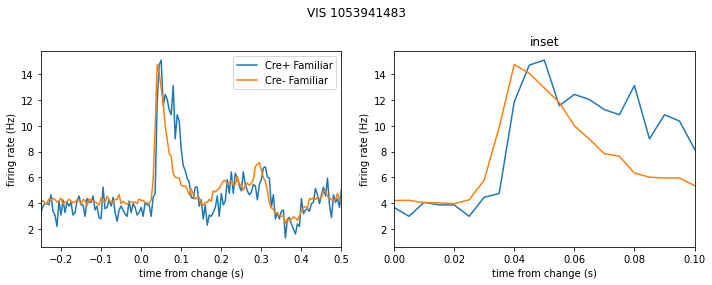

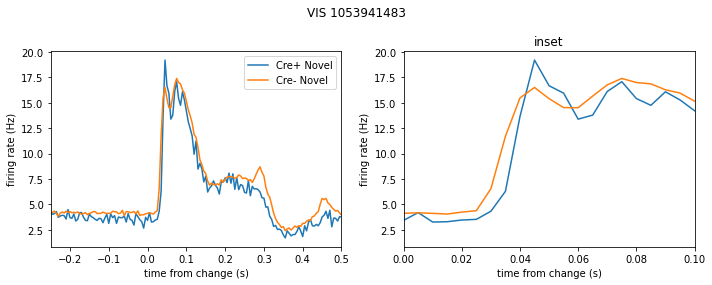

In [29]:
for isnovel in [False, True]:

    fig, axes = plt.subplots(1,2)
    fig.set_size_inches([10, 4])
    fig.suptitle('VIS '+str(session_id))

    # First let's find the trial ids for the relevant change stimuli
    trial_ids = task_stim_table[(task_stim_table['is_novel']==isnovel)].index
    
    # Because our 3D arrays are no longer linked to trial_ids, we need to find their index in the task_stim_table:
    trial_indexer = task_stim_table.index.get_indexer(trial_ids)

    # Now let's use those trial ids to select the corresponding cre positive and cre negative unit tables
    cre_pos_relevant_trials = cre_pos_stim_array[:,:,trial_indexer]
    cre_neg_relevant_trials = cre_neg_stim_array[:,:,trial_indexer]

    # Let's now take the mean over units and trials
    cre_pos_mean_over_trials = np.mean(cre_pos_relevant_trials,axis=(0,2))
    cre_neg_mean_over_trials = np.mean(cre_neg_relevant_trials,axis=(0,2))

    # Now plot. We're plotting twice to show two time scales, and plotting Cre+ and Cre- as separate lines
    [ax.plot(time_array, cre_pos_mean_over_trials) for ax in axes]
    [ax.plot(time_array, cre_neg_mean_over_trials) for ax in axes]

    xlims = ([-0.25, 0.5], [0, 0.1])
    for ax, xlim in zip(axes, xlims):
        ax.set_xlabel('time from change (s)')
        ax.set_ylabel('firing rate (Hz)')
        ax.set_xlim(xlim)

    axes[1].set_title('inset')

    if isnovel:
        axes[0].legend(['Cre+ Novel', 'Cre- Novel'])
    else:
        axes[0].legend(['Cre+ Familiar', 'Cre- Familiar'])

    fig.tight_layout()